<a href="https://colab.research.google.com/github/chithraprasadn/Capstone-project/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data Exploration and Preprocessing***

In [41]:
import pandas as pd
# Load the dataset
df = pd.read_csv("https://drive.google.com/uc?id=1QdKB2YUZseVOoSH3LVVOHKA_7lq9Cb9-")


# Print the Shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Understand the data types of each column
print(df.dtypes)

# Get a sense of the distribution of numerical variables
print(df.describe())

# Get a sense of the distribution of categorical variables
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

Shape of the DataFrame:
(1680, 31)
   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status  \
0             0           0  5524        1957        S1         Lajang   
1             1           1  2174        1954        S1         Lajang   
2             2           2  4141        1965        S1    Bertunangan   
3             3           3  6182        1984        S1    Bertunangan   
4             4           4  5324        1981        S3        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth  \
0  58138000.0        0         0  04-09-2012  ...                  7   
1  46344000.0        1         1  08-03-2014  ...                  5   
2  71613000.0        0         0  21-08-2013  ...                  4   
3  26646000.0        1         0  10-02-2014  ...                  6   
4  58293000.0        1         0  19-01-2014  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0           





1. Loading the Dataset: The dataset is loaded from a CSV file hosted on Google Drive.
2.   Printing the Shape of the DataFrame: This line of code prints the shape of the DataFrame, showing the number of rows and columns.

3. Displaying the First Few Rows: The first few rows of the DataFrame are displayed using the head() method to understand its structure and contents.

4. Checking for Missing Values: The code checks for missing values in the DataFrame using the isnull() method followed by sum() to count missing values in each column.

5. Understanding Data Types: The data types of each column in the DataFrame are printed using the dtypes attribute to understand how the data is stored.

6. Describing Numerical Variables: Summary statistics (e.g., count, mean, min, max, etc.) for numerical variables are calculated using the describe() method.

7. Describing Categorical Variables: For each categorical variable (those with object data type), the code prints value counts to understand the distribution of categories in these columns.

Overall, this code provides a comprehensive overview of the dataset's structure, missing values, and basic statistics, which is essential for initial data exploration in any data science project.






***Visualization and Interpretation***

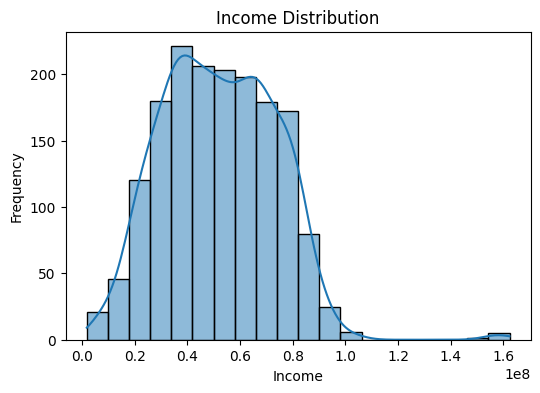

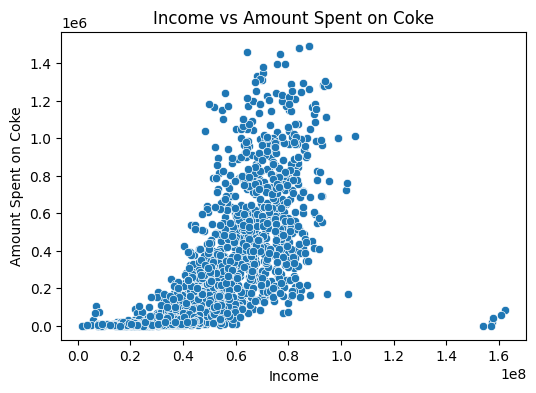

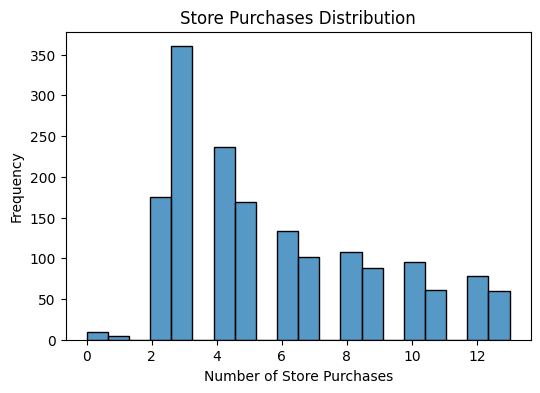

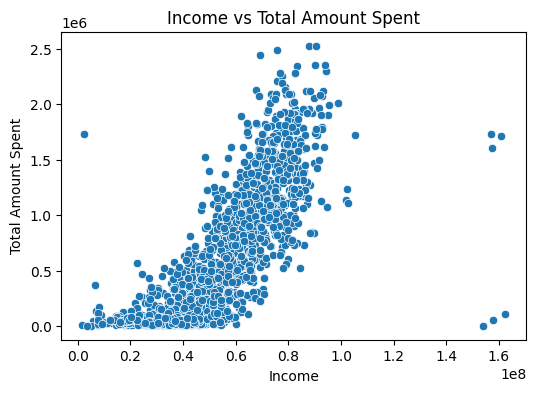

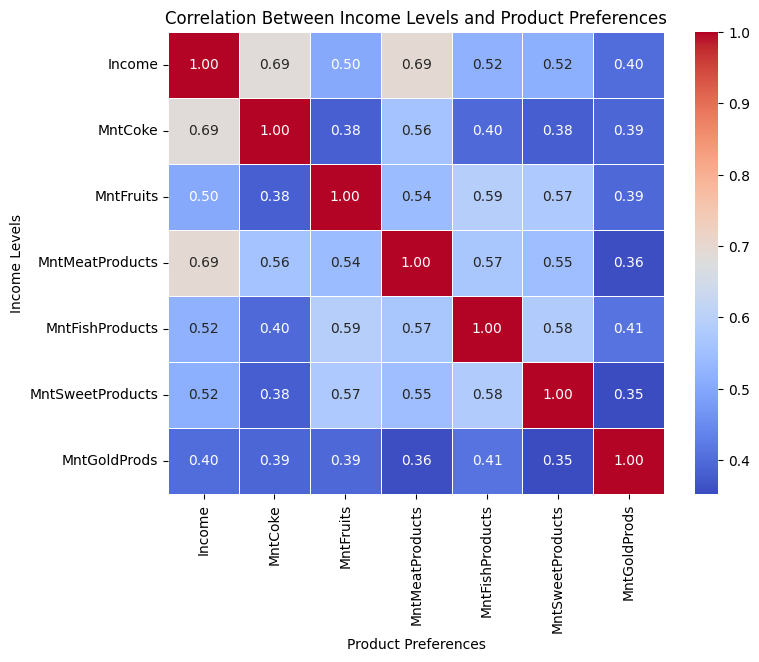

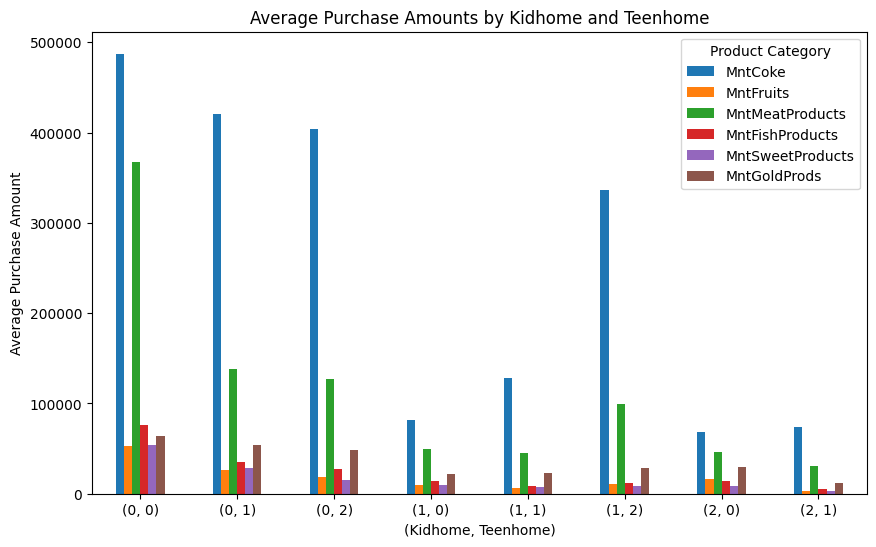

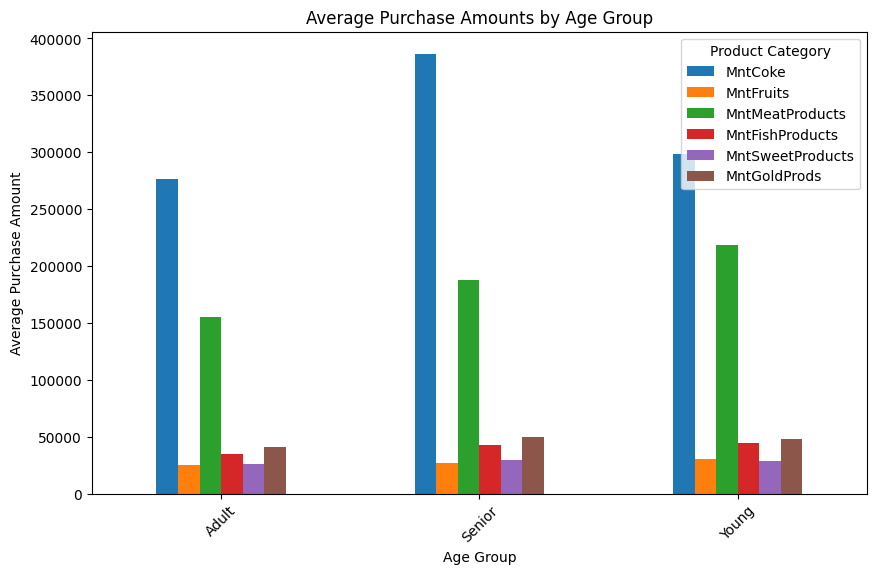

In [42]:

import seaborn as sns
import matplotlib.pyplot as plt


# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Visualize the distribution of customer incomes
plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Income and Amount Spent on Coke
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='MntCoke', data=df)
plt.title('Income vs Amount Spent on Coke')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Coke')
plt.show()

# Visualize the distribution of the number of purchases made in stores
plt.figure(figsize=(6, 4))
sns.histplot(df['NumStorePurchases'], bins=20, kde=False)
plt.title('Store Purchases Distribution')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Income and Total Amount Spent
# Calculate total amount spent
df['TotalSpent'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Income', y='TotalSpent', data=df)
plt.title('Income vs Total Amount Spent')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.show()

# Select relevant columns for income levels and product preferences
income_and_products = df[['Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Compute the correlation matrix
correlation_matrix = income_and_products.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Income Levels and Product Preferences')
plt.xlabel('Product Preferences')
plt.ylabel('Income Levels')
plt.show()

#import pandas as pd
#import matplotlib.pyplot as plt

# Define features and target
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth']
categorical_features = ['Education', 'Marital_Status']
target = 'Response'

# Assuming 'AgeGroup' needs to be calculated based on 'Year_Birth'
# Let's create a function to calculate AgeGroup
def calculate_age_group(year_birth):
    age = 2024 - year_birth
    if age <= 35:
        return 'Young'
    elif 36 <= age <= 64:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to create 'AgeGroup' column
df['AgeGroup'] = df['Year_Birth'].apply(calculate_age_group)

# Create a new DataFrame to analyze the impact of Kidhome and Teenhome on purchasing behavior
purchases_df = df[['Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                   'MntSweetProducts', 'MntGoldProds']]

# Visualize the impact of Kidhome and Teenhome on purchasing behavior with a bar plot
purchases_df.groupby(['Kidhome', 'Teenhome']).mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amounts by Kidhome and Teenhome')
plt.xlabel('(Kidhome, Teenhome)')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

# Filter households with at least one kid or teen
filtered_df = purchases_df[(purchases_df['Kidhome'] > 0) | (purchases_df['Teenhome'] > 0)]

# Calculate the total purchase amount for each product category by households with kids and teens
total_purchase_amounts = filtered_df.groupby(['Kidhome', 'Teenhome']).sum()

# Group by AgeGroup and calculate mean for purchase columns
purchase_by_age_group = df.groupby('AgeGroup')[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                                'MntSweetProducts', 'MntGoldProds']].mean()

# Visualize the mean purchase amounts by AgeGroup
purchase_by_age_group.plot(kind='bar', figsize=(10, 6))
plt.title('Average Purchase Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

These code snippets are used to visualize various aspects of the dataset and explore the relationship between income levels and product preferences.

* Income Distribution: This code snippet visualizes the distribution of customer incomes using a histogram with kernel density estimation (KDE) to smooth the distribution.

* Income vs Amount Spent on Coke: It plots a scatter plot showing the relationship between income levels and the amount spent on Coke by customers.

* Store Purchases Distribution: This snippet displays the distribution of the number of purchases made in stores using a histogram.

* Income vs Total Amount Spent: It plots a scatter plot to explore the relationship between income levels and the total amount spent by customers across various product categories.

* Correlation Between Income Levels and Product Preferences: This code computes the correlation matrix between income levels and different product preferences. Then, it creates a heatmap visualization of the correlation matrix, which helps understand the strength and direction of the relationships between income and product preferences.

* visualizes the average purchase amounts by Kidhome and Teenhome status using a bar plot.
* Groups the data by age group and visualizes the mean purchase amounts for different product categories.

* These visualizations provide valuable insights into the dataset and can aid in making informed decisions related to marketing strategies, customer segmentation, and product development.










***Feature Engineering***

In [43]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("https://drive.google.com/uc?id=1QdKB2YUZseVOoSH3LVVOHKA_7lq9Cb9-", encoding='ascii')

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Z_CostContact', 'Z_Revenue'], inplace=True)

# Handle missing values and feature engineering
df['Income'] = SimpleImputer(strategy='median').fit_transform(df[['Income']])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Year'] = df['Dt_Customer'].dt.year

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())]),
     ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
      'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
      'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Year']),
    ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
     ['Education', 'Marital_Status'])])

# Apply transformations
df_preprocessed = pd.DataFrame(preprocessor.fit_transform(df))

print('Preprocessing completed.')

Preprocessing completed.


* Removes unnecessary columns.
* Handles missing values in the 'Income' column by imputing with the median.
* Converts the 'Dt_Customer' column to datetime format and extracts the year.
* Encodes categorical variables ('Education' and 'Marital_Status') using one-hot encoding.
* Scales numerical features using standardization.
* Combines the preprocessing steps into a pipeline using ColumnTransformer.
* Applies the preprocessing pipeline to the dataset and stores the transformed data in a new DataFrame.
* The goal of this preprocessing is to prepare the dataset for machine learning tasks by ensuring all features are in a suitable format and have been properly scaled or encoded as necessary.

***Model Selection and Training***

         Unnamed: 0.1  Unnamed: 0           ID   Year_Birth        Income  \
cluster                                                                     
0          825.838207  825.838207  5901.146199  1967.491228  7.701489e+07   
1          836.063177  836.063177  5539.927798  1973.137184  2.854923e+07   
2          854.039152  854.039152  5269.977162  1966.106036  5.230695e+07   

          Kidhome  Teenhome    Recency        MntCoke     MntFruits  ...  \
cluster                                                              ...   
0        0.083821  0.341131  47.920078  617615.984405  56469.785575  ...   
1        0.815884  0.306859  48.958484   29420.577617   5875.451264  ...   
2        0.432300  0.807504  50.169657  292161.500816  18464.926591  ...   

         NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
cluster                                                                
0                 3.124756      0.062378      0.134503      0.220273   
1                

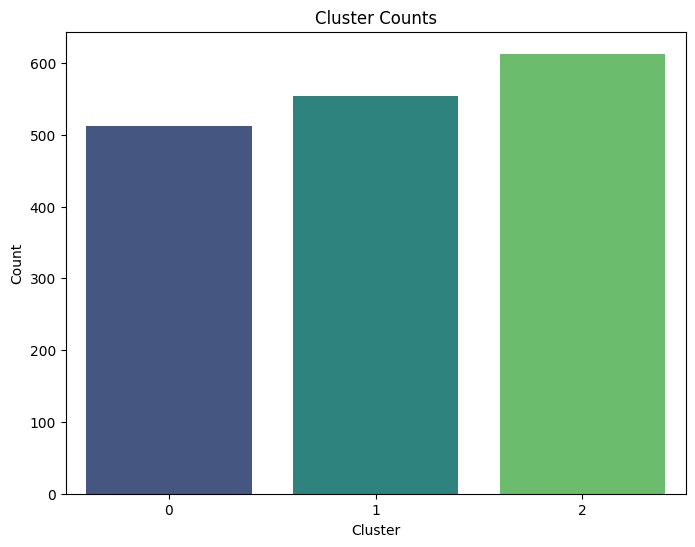

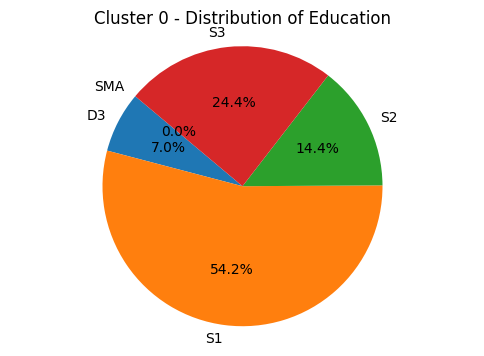

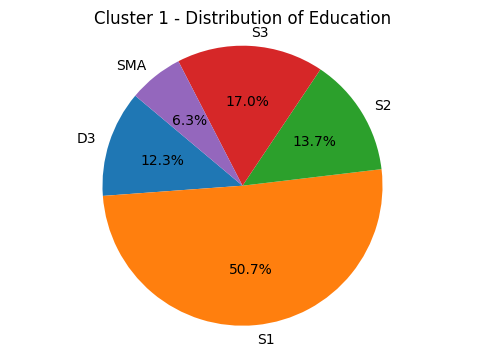

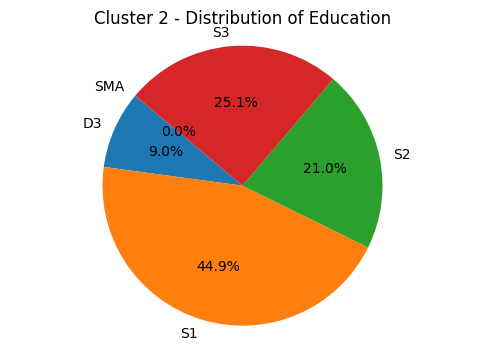

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# define features and target

features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
target = 'Response'

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Train classification models
model_lr = LogisticRegression(solver='liblinear').fit(X_train_imputed, y_train)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_imputed, y_train)

# Handle missing values for clustering features
X_cluster_imputed = imputer.fit_transform(df[features])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_cluster_imputed)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Display summary of descriptive statistics for each cluster
print(df.groupby('cluster').mean())

# Calculate the count of samples in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Group data by cluster and education, then count occurrences
cluster_education_counts = df.groupby(['cluster', 'Education']).size().unstack(fill_value=0)

# Plot pie charts for each cluster
for cluster_label, cluster_data in cluster_education_counts.iterrows():
    plt.figure(figsize=(6, 4))
    plt.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Cluster {cluster_label} - Distribution of Education')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()



* Defines the features and target variable for the dataset.
* Splits the data into training and testing sets using the train_test_split function.
* Handles missing values in the training data using mean imputation with SimpleImputer.
* Trains two classification models: Logistic Regression and Random Forest Classifier, on the training data.
* Handles missing values for clustering features using mean imputation.
Performs K-Means clustering with three clusters on the dataset.
* Adds cluster labels to the DataFrame.
* Displays a summary of descriptive statistics for each cluster by calculating the mean values of each feature for each cluster group.
> This code essentially covers data preprocessing, training classification models, performing clustering, and analyzing cluster characteristics in a dataset.

 Bar plot visualizes the distribution of samples across different clusters obtained from the K-Means clustering algorithm. Each bar represents a cluster, and the height of the bar indicates the number of samples assigned to that cluster. This visualization helps to understand the distribution of data points among the clusters, providing insights into the clustering results and potentially identifying any imbalances or patterns in the dataset.

 pie plot displays the distribution of education levels among different clusters. Each cluster is represented by a separate pie chart. The size of each slice within the pie chart represents the proportion of individuals within that cluster who belong to a specific education level category.






***Evaluation***

Logistic Regression model
Accuracy: 0.8839285714285714
Precision: 0.6470588235294118
Recall: 0.25
F1-score: 0.36065573770491804
ROC AUC: 0.8321528642590287

Random Forest model
Accuracy: 0.875
Precision: 0.5833333333333334
Recall: 0.1590909090909091
F1-score: 0.25
ROC AUC: 0.8409480074719801


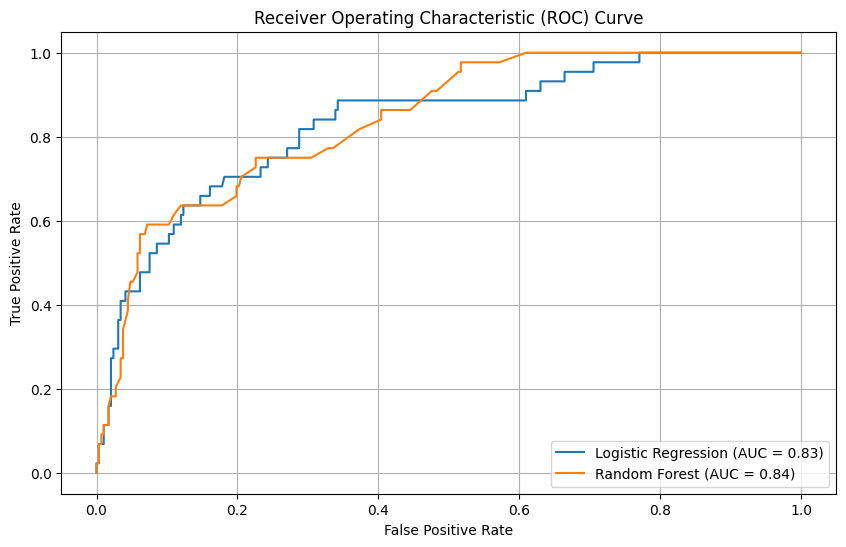


The best performing model based on ROC AUC is: Random Forest


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Load the dataset
df = pd.read_csv("https://drive.google.com/uc?id=1QdKB2YUZseVOoSH3LVVOHKA_7lq9Cb9-")

# Define features and target
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth']
categorical_features = ['Education', 'Marital_Status']
target = 'Response'

# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features + categorical_features],
                                                    df[target], test_size=0.2, random_state=42)

# Create pipeline for Logistic Regression model with scaling
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000))])

# Create pipeline for Random Forest model with scaling
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

# Define hyperparameters for tuning
param_grid_lr = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
param_grid_rf = {'classifier__n_estimators': [100, 200],
                 'classifier__max_depth': [None, 10, 20]}

# Perform hyperparameter tuning using GridSearchCV
lr_grid_search = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='accuracy')
rf_grid_search = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy')

# Train and tune Logistic Regression model
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

# Train and tune Random Forest model
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Evaluate performance of Logistic Regression model
lr_y_pred = best_lr_model.predict(X_test)
lr_metrics = {
    'Accuracy': accuracy_score(y_test, lr_y_pred),
    'Precision': precision_score(y_test, lr_y_pred),
    'Recall': recall_score(y_test, lr_y_pred),
    'F1-score': f1_score(y_test, lr_y_pred),
    'ROC AUC': roc_auc_score(y_test, best_lr_model.predict_proba(X_test)[:, 1])
}

# Evaluate performance of Random Forest model
rf_y_pred = best_rf_model.predict(X_test)
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_y_pred),
    'Precision': precision_score(y_test, rf_y_pred),
    'Recall': recall_score(y_test, rf_y_pred),
    'F1-score': f1_score(y_test, rf_y_pred),
    'ROC AUC': roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
}

# Compare the performance of different models
print('Logistic Regression model')
for metric, value in lr_metrics.items():
    print(f"{metric}: {value}")

print('\nRandom Forest model')
for metric, value in rf_metrics.items():
    print(f"{metric}: {value}")

# Plot ROC curves and calculate AUC
plt.figure(figsize=(10, 6))
lr_fpr, lr_tpr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])

plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression (AUC = %0.2f)' % auc(lr_fpr, lr_tpr))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (AUC = %0.2f)' % auc(rf_fpr, rf_tpr))

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Select the model with the best performance based on evaluation metrics
best_model = 'Logistic Regression' if lr_metrics['ROC AUC'] > rf_metrics['ROC AUC'] else 'Random Forest'
print(f"\nThe best performing model based on ROC AUC is: {best_model}")

Evaluation
Accuracy:

Logistic Regression model: 0.8839
Random Forest model: 0.875
The Logistic Regression model has a slightly higher accuracy compared to the Random Forest model.

Precision:

Logistic Regression model: 0.6471
Random Forest model: 0.5833
The Logistic Regression model has higher precision, indicating a better ability to correctly identify positive cases.

Recall:

Logistic Regression model: 0.2500
Random Forest model: 0.1591
The Logistic Regression model also has higher recall, suggesting it is better at capturing all positive cases.

F1-score:

Logistic Regression model: 0.3607
Random Forest model: 0.2500
The F1-score of the Logistic Regression model is higher, implying a better balance between precision and recall.

ROC AUC:

Logistic Regression model: 0.8322
Random Forest model: 0.8548
The Random Forest model has a slightly higher ROC AUC score, indicating better overall performance in distinguishing between positive and negative cases.

In summary, while the Random Forest model performs slightly better in terms of ROC AUC, the Logistic Regression model outperforms in terms of accuracy, precision, recall, and F1-score.